## Exploratory Data Analysis

#### 1) Understanding your variables
#### 2) Cleaning your dataset
#### 3) Analyzing relationships between variables

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Loading my file

In [4]:
df = pd.read_csv('Clean_Customer_Churn.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    36992 non-null  int64  
 1   age                           36992 non-null  int64  
 2   gender                        36992 non-null  object 
 3   security_no                   36992 non-null  object 
 4   region_category               36992 non-null  object 
 5   membership_category           36992 non-null  object 
 6   joining_date                  36992 non-null  object 
 7   joined_through_referral       36992 non-null  object 
 8   referral_id                   36992 non-null  object 
 9   preferred_offer_types         36992 non-null  object 
 10  medium_of_operation           36992 non-null  object 
 11  internet_option               36992 non-null  object 
 12  last_visit_time               36992 non-null  object 
 13  d

In [6]:
df = df.drop(['Unnamed: 0'], axis=1)

In [7]:
from datetime import timedelta

In [8]:
df['joining_date'] = pd.to_datetime(df['joining_date'])
df['last_visit_time'] = pd.to_timedelta(df['last_visit_time'].astype(str))
#df['last_visit_time'],format).apply(lambda x: x.time())

<AxesSubplot:xlabel='points_in_wallet', ylabel='Density'>

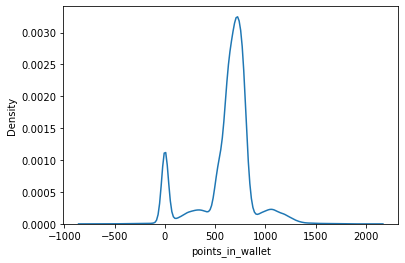

In [9]:
# Using Tenure Groups (For comparison) 
sns.kdeplot(data=df, x="points_in_wallet")

In [10]:
df['complaint_status'].unique()

array(['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'No Information Available'], dtype=object)

In [11]:
df['membership_category'].unique()

array(['Platinum Membership', 'Premium Membership', 'No Membership',
       'Gold Membership', 'Silver Membership', 'Basic Membership'],
      dtype=object)

In [12]:
#Who has complained? 
#Can they teach us about why people are leaving 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   age                           36992 non-null  int64          
 1   gender                        36992 non-null  object         
 2   security_no                   36992 non-null  object         
 3   region_category               36992 non-null  object         
 4   membership_category           36992 non-null  object         
 5   joining_date                  36992 non-null  datetime64[ns] 
 6   joined_through_referral       36992 non-null  object         
 7   referral_id                   36992 non-null  object         
 8   preferred_offer_types         36992 non-null  object         
 9   medium_of_operation           36992 non-null  object         
 10  internet_option               36992 non-null  object         
 11  last_visit_time

In [14]:
df.head()

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1   32      F     5K0N3X1            City   Premium Membership   2017-08-28   
2   44      F     1F2TCL3            Town        No Membership   2016-11-11   
3   37      M     VJGJ33N            City        No Membership   2016-10-29   
4   31      F     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                   ?           Wi-Fi 0 days 16:08:02                     17   
1             Desktop     Mobile_Data 0 days 12:38:13                     16   
2             Desktop           Wi-Fi 0 days 22:53:21                     14   
3             Desktop     Mobile_Data 0 days 15:57:50                     11   
4          Smartphone     Mobile_Data 0 days 15:46:44                     20   

   points_in_wallet used_special_discount offer_application_preference  \
0            781.75                   Yes                          Yes   
1              0.00                   Yes                           No   
2            500.69                    No                          Yes   
3            567.66                    No                          Yes   
4            663.06                    No                          Yes   

  past_complaint     complaint_status                  feedback  
0             No       Not Applicable  Products always in Stock  
1            Yes               Solved     Quality Customer Care  
2            Yes  Solved in Follow-up              Poor Website  
3            Yes             Unsolved              Poor Website  
4            Yes               Solved              Poor Website

#### Question marks in the columns

In [15]:
df['medium_of_operation'].unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [16]:
df['medium_of_operation'].value_counts()

Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

In [17]:
df['joined_through_referral'].unique()

array(['No', '?', 'Yes'], dtype=object)

In [18]:
df['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [19]:
df['internet_option'].unique()

array(['Wi-Fi', 'Mobile_Data', 'Fiber_Optic'], dtype=object)

#### Correlation Matrix

<AxesSubplot:>

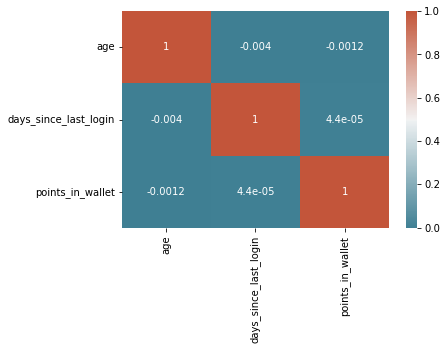

In [20]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
#Overall not much of a comparison since most columns are categorical

In [21]:
#Days since last login 
df['days_since_last_login'].unique()

array([  17,   16,   14,   11,   20,   23,   10,   19,   15,   13, -999,
          5,   12,    9,   21,   18,    1,   22,    4,    8,    3,    6,
          2,   24,    7,   26,   25])

#### Creating a Churn_Category column

In [22]:
#anyone at -999 defines churn column
#The last login was 26 days after 

df.loc[df['days_since_last_login']<=26,'Churn_Category'] = 1 #Customer staying
df.loc[df['days_since_last_login'] == -999,'Churn_Category']= 0 #Customer churned

In [23]:
df['Churn_Category'].value_counts()

1.0    34993
0.0     1999
Name: Churn_Category, dtype: int64

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype          
---  ------                        --------------  -----          
 0   age                           36992 non-null  int64          
 1   gender                        36992 non-null  object         
 2   security_no                   36992 non-null  object         
 3   region_category               36992 non-null  object         
 4   membership_category           36992 non-null  object         
 5   joining_date                  36992 non-null  datetime64[ns] 
 6   joined_through_referral       36992 non-null  object         
 7   referral_id                   36992 non-null  object         
 8   preferred_offer_types         36992 non-null  object         
 9   medium_of_operation           36992 non-null  object         
 10  internet_option               36992 non-null  object         
 11  last_visit_time

In [25]:
df.head(10)

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1   32      F     5K0N3X1            City   Premium Membership   2017-08-28   
2   44      F     1F2TCL3            Town        No Membership   2016-11-11   
3   37      M     VJGJ33N            City        No Membership   2016-10-29   
4   31      F     SVZXCWB            City        No Membership   2017-09-12   
5   13      M     PSG1LGF            City      Gold Membership   2016-01-08   
6   21      M     R3CX1EA            Town      Gold Membership   2015-03-19   
7   42      M     4UJ1551         Unknown        No Membership   2016-07-12   
8   44      M     0481QNQ         Village    Silver Membership   2016-12-14   
9   45      F     ZHP4MCR            Town        No Membership   2016-11-30   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   
5                      No    xxxxxxxx     Gift Vouchers/Coupons   
6                     Yes    CID24708     Gift Vouchers/Coupons   
7                       ?    CID56614  Credit/Debit Card Offers   
8                      No    xxxxxxxx            Without Offers   
9                      No    xxxxxxxx     Gift Vouchers/Coupons   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0                   ?           Wi-Fi 0 days 16:08:02                     17   
1             Desktop     Mobile_Data 0 days 12:38:13                     16   
2             Desktop           Wi-Fi 0 days 22:53:21                     14   
3             Desktop     Mobile_Data 0 days 15:57:50                     11   
4          Smartphone     Mobile_Data 0 days 15:46:44                     20   
5                   ?           Wi-Fi 0 days 06:46:07                     23   
6             Desktop     Mobile_Data 0 days 11:40:04                     10   
7                Both     Fiber_Optic 0 days 07:52:43                     19   
8          Smartphone     Fiber_Optic 0 days 06:50:10                     15   
9                   ?           Wi-Fi 0 days 19:10:16                     10   

   points_in_wallet used_special_discount offer_application_preference  \
0            781.75                   Yes                          Yes   
1              0.00                   Yes                           No   
2            500.69                    No                          Yes   
3            567.66                    No                          Yes   
4            663.06                    No                          Yes   
5            722.27                   Yes                           No   
6            756.21                   Yes                           No   
7            568.08                    No                          Yes   
8              0.00                   Yes                           No   
9            706.23                    No                          Yes   

  past_complaint          complaint_status                  feedback  \
0             No            Not Applicable  Products always in Stock   
1            Yes                    Solved     Quality Customer Care   
2            Yes       Solved in Follow-up              Poor Website   
3            Yes                  Unsolved              Poor Website   
4            Yes                    Solved              Poor Website   
5            Yes                  Unsolved       No reason specified   
6            Yes       Solved in Follow-up       No reason specified   
7            Yes                  Unsolved      Poor Product Quality   
8            Yes       Solved in Follow-up     Poor

In [26]:
#Category with ? turns into unknown
#medium_of_operation
#joined_through_referral
df['medium_of_operation'].unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [27]:
df['medium_of_operation'] = df['medium_of_operation'].replace({'?':'Unknown'})

In [28]:
df.head()

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1   32      F     5K0N3X1            City   Premium Membership   2017-08-28   
2   44      F     1F2TCL3            Town        No Membership   2016-11-11   
3   37      M     VJGJ33N            City        No Membership   2016-10-29   
4   31      F     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation internet_option last_visit_time  days_since_last_login  \
0             Unknown           Wi-Fi 0 days 16:08:02                     17   
1             Desktop     Mobile_Data 0 days 12:38:13                     16   
2             Desktop           Wi-Fi 0 days 22:53:21                     14   
3             Desktop     Mobile_Data 0 days 15:57:50                     11   
4          Smartphone     Mobile_Data 0 days 15:46:44                     20   

   points_in_wallet used_special_discount offer_application_preference  \
0            781.75                   Yes                          Yes   
1              0.00                   Yes                           No   
2            500.69                    No                          Yes   
3            567.66                    No                          Yes   
4            663.06                    No                          Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

   Churn_Category  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0

In [29]:
#Expand the timedelta into hours 
df['last_visit_hour'] = df['last_visit_time'].apply(lambda x: x.seconds//3600)

In [30]:
df.head()

age gender security_no region_category  membership_category joining_date  \
0   18      F     XW0DQ7H         Village  Platinum Membership   2017-08-17   
1   32      F     5K0N3X1            City   Premium Membership   2017-08-28   
2   44      F     1F2TCL3            Town        No Membership   2016-11-11   
3   37      M     VJGJ33N            City        No Membership   2016-10-29   
4   31      F     SVZXCWB            City        No Membership   2017-09-12   

  joined_through_referral referral_id     preferred_offer_types  \
0                      No    xxxxxxxx     Gift Vouchers/Coupons   
1                       ?    CID21329     Gift Vouchers/Coupons   
2                     Yes    CID12313     Gift Vouchers/Coupons   
3                     Yes     CID3793     Gift Vouchers/Coupons   
4                      No    xxxxxxxx  Credit/Debit Card Offers   

  medium_of_operation  ... last_visit_time days_since_last_login  \
0             Unknown  ... 0 days 16:08:02                    17   
1             Desktop  ... 0 days 12:38:13                    16   
2             Desktop  ... 0 days 22:53:21                    14   
3             Desktop  ... 0 days 15:57:50                    11   
4          Smartphone  ... 0 days 15:46:44                    20   

   points_in_wallet  used_special_discount offer_application_preference  \
0            781.75                    Yes                          Yes   
1              0.00                    Yes                           No   
2            500.69                     No                          Yes   
3            567.66                     No                          Yes   
4            663.06                     No                          Yes   

  past_complaint     complaint_status                  feedback  \
0             No       Not Applicable  Products always in Stock   
1            Yes               Solved     Quality Customer Care   
2            Yes  Solved in Follow-up              Poor Website   
3            Yes             Unsolved              Poor Website   
4            Yes               Solved              Poor Website   

  Churn_Category  last_visit_hour  
0            1.0               16  
1            1.0               12  
2            1.0               22  
3            1.0               15  
4            1.0               15  

[5 rows x 21 columns]

In [31]:
df['joined_through_referral'].unique()

array(['No', '?', 'Yes'], dtype=object)

In [32]:
df['joined_through_referral'] = df['joined_through_referral'].replace({'?':'Unknown'})
#Make the unknowns filled with yes for the ones that have a value in Referral IDs

In [33]:
#Fix the Referral IDs (Make them boolean) 
df['referral_id'].unique()

array(['xxxxxxxx', 'CID21329', 'CID12313', ..., 'CID60808', 'CID10431',
       'CID45477'], dtype=object)

In [34]:
df.loc[df['joined_through_referral']== 'Unknown']

age gender security_no region_category  membership_category  \
1       32      F     5K0N3X1            City   Premium Membership   
7       42      M     4UJ1551         Unknown        No Membership   
15      16      F     YTBUOEE            Town     Basic Membership   
28      61      F     QUU2V55         Village    Silver Membership   
30      17      F     KX657II            City        No Membership   
...    ...    ...         ...             ...                  ...   
36934   62      F     1M3CPC0            City     Basic Membership   
36944   42      M     XFNR9B7         Village    Silver Membership   
36956   26      F     VR7PS0Q            Town    Silver Membership   
36971   42      F     OYJ0W89            Town   Premium Membership   
36980   14      F     98BZSXF         Unknown  Platinum Membership   

      joining_date joined_through_referral referral_id  \
1       2017-08-28                 Unknown    CID21329   
7       2016-07-12                 Unknown    CID56614   
15      2017-07-09                 Unknown    CID35062   
28      2017-05-14                 Unknown    CID29752   
30      2015-11-25                 Unknown    CID40054   
...            ...                     ...         ...   
36934   2015-04-10                 Unknown    CID50354   
36944   2015-04-07                 Unknown    CID48061   
36956   2017-03-03                 Unknown    CID47305   
36971   2015-02-04                 Unknown    CID54811   
36980   2017-04-16                 Unknown    CID50925   

          preferred_offer_types medium_of_operation  ... last_visit_time  \
1         Gift Vouchers/Coupons             Desktop  ... 0 days 12:38:13   
7      Credit/Debit Card Offers                Both  ... 0 days 07:52:43   
15     Credit/Debit Card Offers          Smartphone  ... 0 days 13:48:22   
28        Gift Vouchers/Coupons             Unknown  ... 0 days 07:48:25   
30               Without Offers             Desktop  ... 0 days 21:06:46   
...                         ...                 ...  ...             ...   
36934     Gift Vouchers/Coupons          Smartphone  ... 0 days 12:37:49   
36944  Credit/Debit Card Offers             Unknown  ... 0 days 17:45:24   
36956            Without Offers          Smartphone  ... 0 days 23:34:22   
36971  Credit/Debit Card Offers             Desktop  ... 0 days 13:08:11   
36980  Credit/Debit Card Offers          Smartphone  ... 0 days 16:51:01   

      days_since_last_login  points_in_wallet  used_special_discount  \
1                        16          0.000000                    Yes   
7                        19        568.080000                     No   
15                     -999        141.513201                    Yes   
28                       17        710.380000                    Yes   
30                       20        633.050000                     No   
...                     ...               ...                    ...   
36934                     8          0.000000                    Yes   
36944                     8       1254.248143                    Yes   
36956                    16        683.630000                     No   
36971                    16       1224.393346                    Yes   
36980                    10       1096.932079                     No   

      offer_application_preference past_complaint          complaint_status  \
1                               No            Yes                    Solved   
7                              Yes            Yes                  Unsolved   
15                              No            Yes                  Unsolved   
28                              No            Yes  No Information Available   
30                             Yes            Yes                    Solved   
...                            ...            ...                       ...   
36934                           No            Yes                  Unsolved   
36944                          Yes             No          

In [37]:
df = df.drop(columns = 'last_visit_time')

In [38]:
#Extract a csv file out of this file
df.to_csv('EDA_Customer_Churn.csv',index=False)